<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<ipython-input-8-47dde5303d4e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-8-47dde5303d4e>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

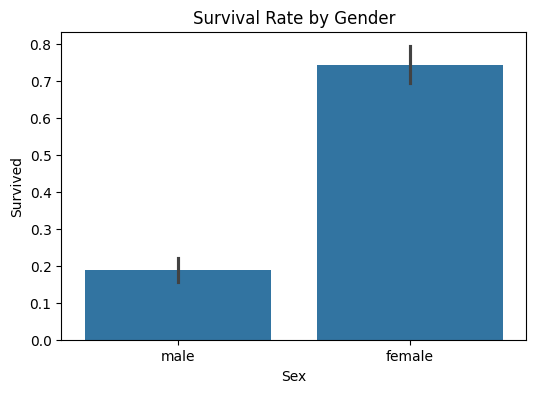

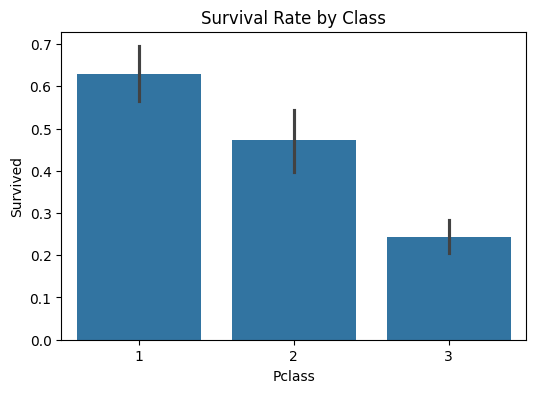

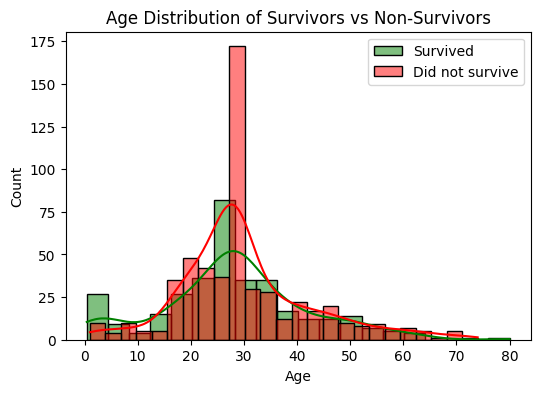

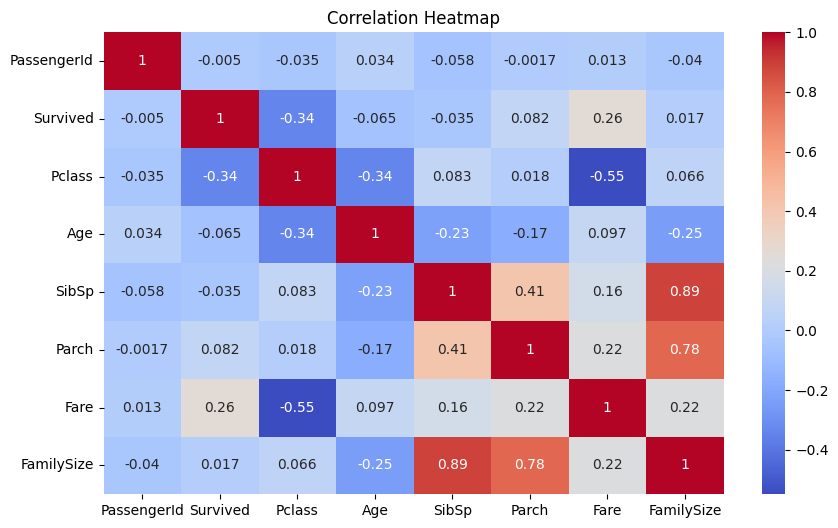

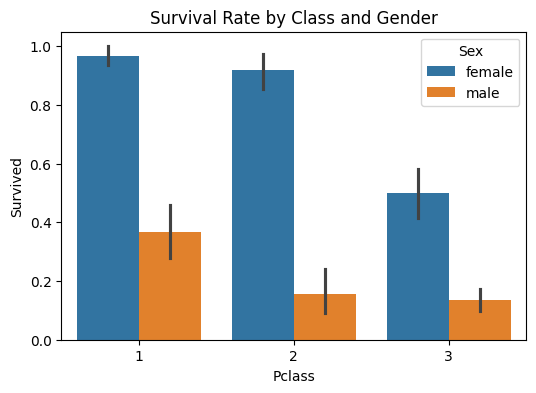

Gender Bias - Survival Rate: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Class Bias - Survival Rate by Pclass: Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


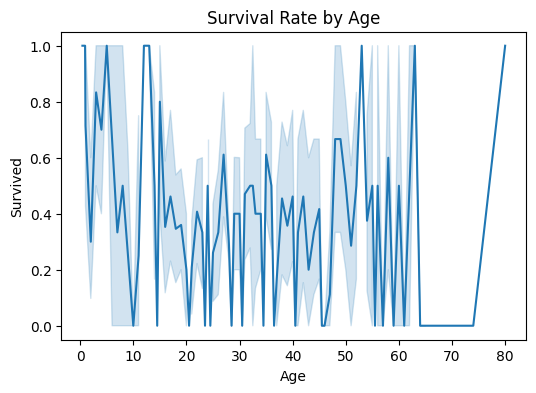

Bias Analysis:
1. Gender Bias: Women had a significantly higher survival rate than men.
2. Class Bias: Passengers in higher classes (1st and 2nd) had better survival chances.
3. Age Bias: Younger passengers (especially children) had higher survival rates.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# Display basic info about the dataset
print(df.info())
print(df.describe())

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Data Preprocessing: Filling missing values for 'Age' and 'Embarked'
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Feature Engineering: Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Basic EDA: Survival rate distribution
survival_rate = df['Survived'].value_counts(normalize=True)
print("Survival Rate:\n", survival_rate)

# Survival rates by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rates by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Age distribution of survivors vs non-survivors
plt.figure(figsize=(6, 4))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Did not survive')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.legend()
plt.show()

# Correlation Heatmap: Features and their correlation with survival
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Hypotheses Formation
# Example hypothesis: Women and children in higher classes have higher survival chances
# Visualize survival by gender and class together
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()

# Bias Analysis: Discuss potential biases
# Gender Bias
gender_survival_rate = df.groupby('Sex')['Survived'].mean()
print(f'Gender Bias - Survival Rate: {gender_survival_rate}')

# Class Bias
class_survival_rate = df.groupby('Pclass')['Survived'].mean()
print(f'Class Bias - Survival Rate by Pclass: {class_survival_rate}')

# Age Bias: Older passengers had lower survival rates?
age_survival_rate = df.groupby('Age')['Survived'].mean()
plt.figure(figsize=(6, 4))
sns.lineplot(x='Age', y='Survived', data=df)
plt.title('Survival Rate by Age')
plt.show()

# Conclusion of Bias Analysis
print("Bias Analysis:")
print("1. Gender Bias: Women had a significantly higher survival rate than men.")
print("2. Class Bias: Passengers in higher classes (1st and 2nd) had better survival chances.")
print("3. Age Bias: Younger passengers (especially children) had higher survival rates.")


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Data Preparation

# 1. Handling Missing Values

# Fill missing 'Age' values with the median value (statistical method)
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Check the data type of 'Embarked'
print(df['Embarked'].dtype)

# Impute missing 'Embarked' values (ensure it is an object type)
if df['Embarked'].dtype == 'O':  # 'O' stands for object (string)
    embarked_imputer = SimpleImputer(strategy='most_frequent')
    df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']])

# Verify no missing values
print(df.isnull().sum())


# Fill missing 'Cabin' values with a placeholder since it has many missing values
df['Cabin'].fillna('U', inplace=True)  # 'U' for unknown

# Verify that there are no missing values left
print(df.isnull().sum())

# 2. Feature Engineering

# Create a new feature 'FamilySize' by adding SibSp (siblings/spouses aboard) and Parch (parents/children aboard)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 to include the passenger themselves

# Extract titles from names (e.g., Mr, Mrs, Miss) and create a new feature 'Title'
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Check the distribution of titles
print(df['Title'].value_counts())

# 3. Normalization and Encoding

# Normalize numerical features: 'Age', 'Fare', and 'FamilySize'
scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

# Encode categorical features:
# 1. Encoding 'Sex' (male/female)
sex_encoder = LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])

# 2. Encoding 'Embarked' (C, Q, S)
embarked_encoder = LabelEncoder()
df['Embarked'] = embarked_encoder.fit_transform(df['Embarked'])

# 3. Encoding 'Title' (Mr, Mrs, Miss, etc.)
title_encoder = LabelEncoder()
df['Title'] = title_encoder.fit_transform(df['Title'])

# Display the prepared data
print(df.head())

# Now the dataset is ready for training machine learning models


object


ValueError: 2

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])  # Drop non-numeric columns
y = df['Survived']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
logreg_pred = logreg.predict(X_test)
dtree_pred = dtree.predict(X_test)
svm_pred = svm.predict(X_test)

# Calculate performance metrics for all models
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Print performance metrics for each model
print_metrics("Logistic Regression", y_test, logreg_pred)
print_metrics("Decision Tree", y_test, dtree_pred)
print_metrics("Support Vector Machine", y_test, svm_pred)

# Hyperparameter Tuning using GridSearchCV for Decision Tree as an example
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best model from GridSearchCV
print(f"\nBest Parameters for Decision Tree: {grid_search.best_params_}")
best_dtree_model = grid_search.best_estimator_

# Evaluate the best model from GridSearchCV
best_dtree_pred = best_dtree_model.predict(X_test)
print_metrics("Tuned Decision Tree", y_test, best_dtree_pred)



Logistic Regression Performance:
Accuracy: 0.8045
Precision: 0.7746
Recall: 0.7432
F1-Score: 0.7586
Confusion Matrix:
[[89 16]
 [19 55]]

Decision Tree Performance:
Accuracy: 0.7765
Precision: 0.7500
Recall: 0.6892
F1-Score: 0.7183
Confusion Matrix:
[[88 17]
 [23 51]]

Support Vector Machine Performance:
Accuracy: 0.5866
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Confusion Matrix:
[[105   0]
 [ 74   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned Decision Tree Performance:
Accuracy: 0.7989
Precision: 0.7969
Recall: 0.6892
F1-Score: 0.7391
Confusion Matrix:
[[92 13]
 [23 51]]


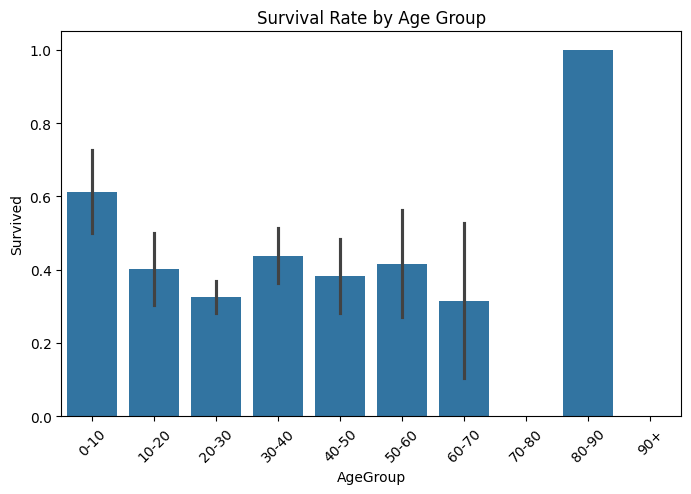

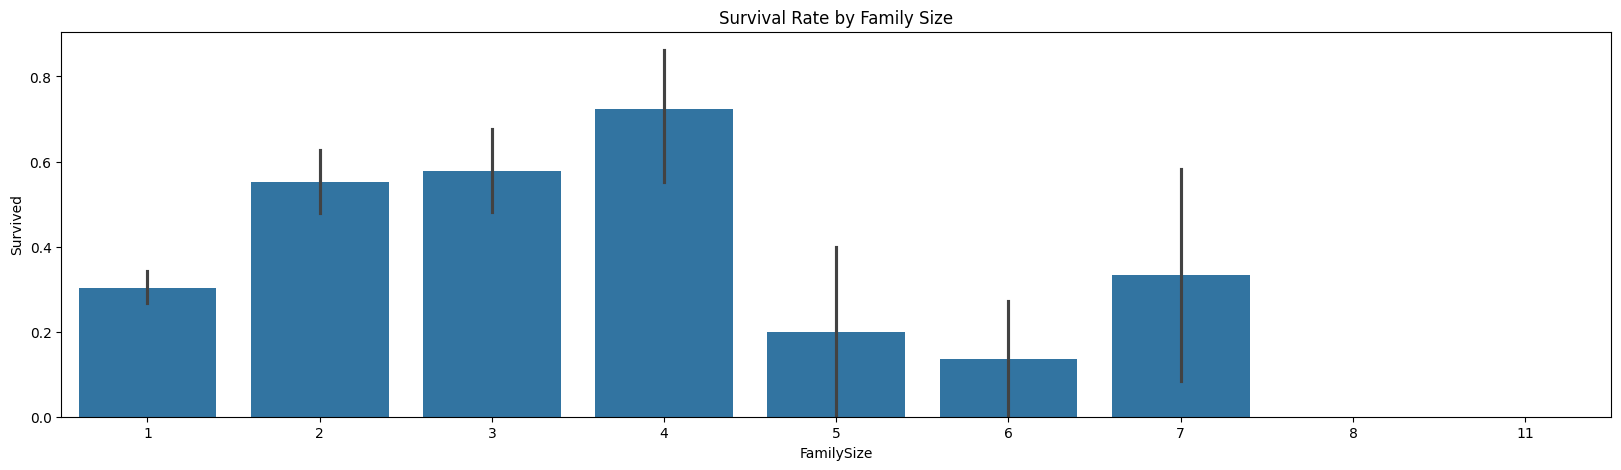

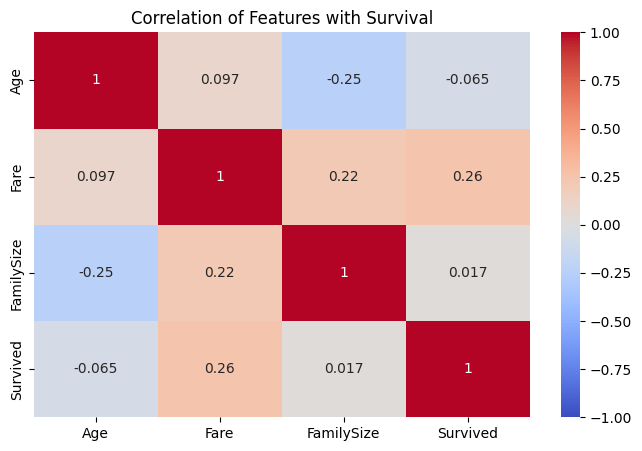

In [9]:
# Create age groups to analyze survival rate by age category
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot survival rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

# Plot survival rate by family size
plt.figure(figsize=(20, 5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


# Plot correlations between numerical features and survival
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Fare', 'FamilySize', 'Survived']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Survival')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    int64   
 12  FamilySize   891 non-null    float64 
 13  Title        891 non-null    int64   
 14  AgeGroup     330 non-null    category
dtypes: category(1), float64(3), int64(8), object(3)
memory usage: 98.8+ KB


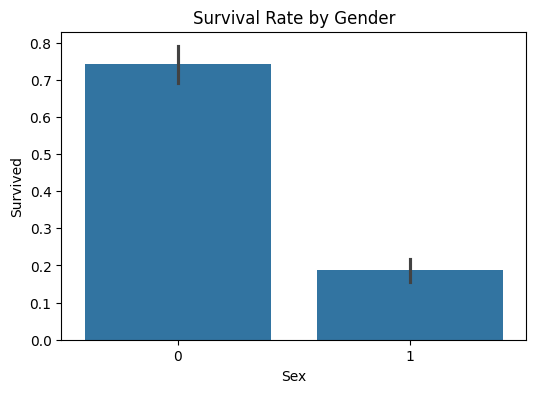

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV



# Display basic info about the dataset
df.info()
df.describe()


# Check for missing values
missing_data = df.isnull().sum()
missing_data[missing_data > 0]


# Plot survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')

# Basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# Verify no missing values remain
print(df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
Title          0
dtype: int64


<ipython-input-9-0b387e080a45>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


                                                Name  FamilySize Title
0                            Braund, Mr. Owen Harris           2    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           2   Mrs
2                             Heikkinen, Miss. Laina           1  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           2   Mrs
4                           Allen, Mr. William Henry           1    Mr


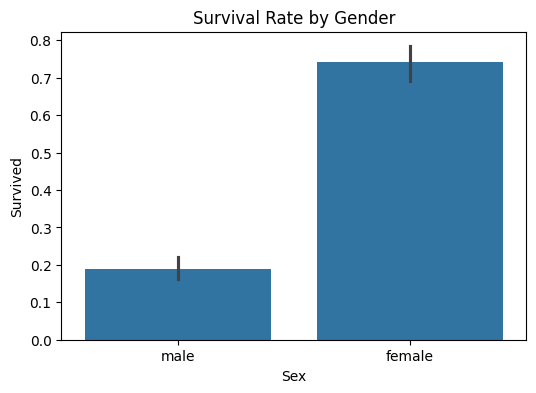

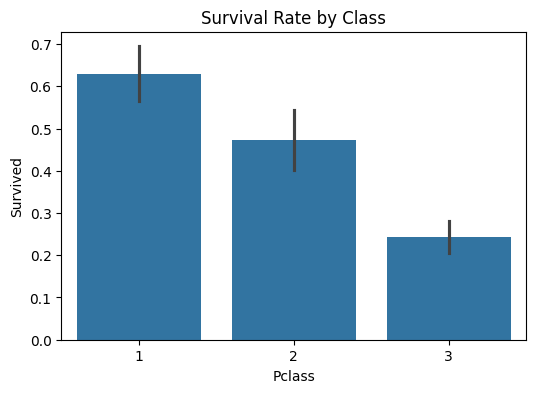

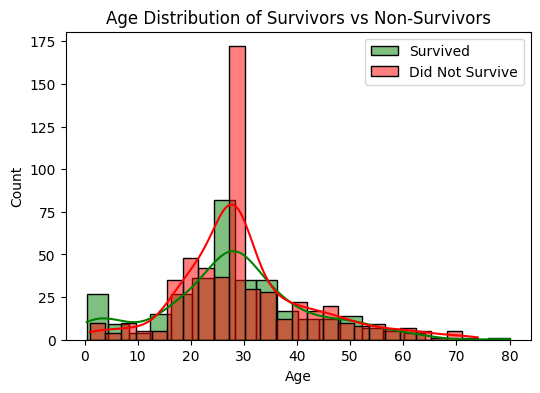

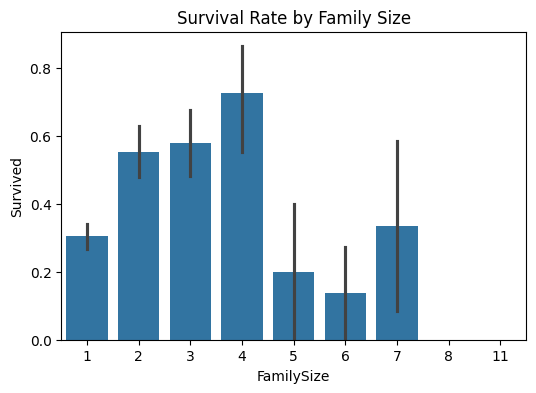

In [ ]:
# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Display the first few rows of the new columns
print(df[['Name', 'FamilySize', 'Title']].head())


import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


# Survival rate by class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Did Not Survive')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.legend()
plt.show()


# Survival rate by family size
plt.figure(figsize=(6, 4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


NameError: name 'missing_after' is not defined

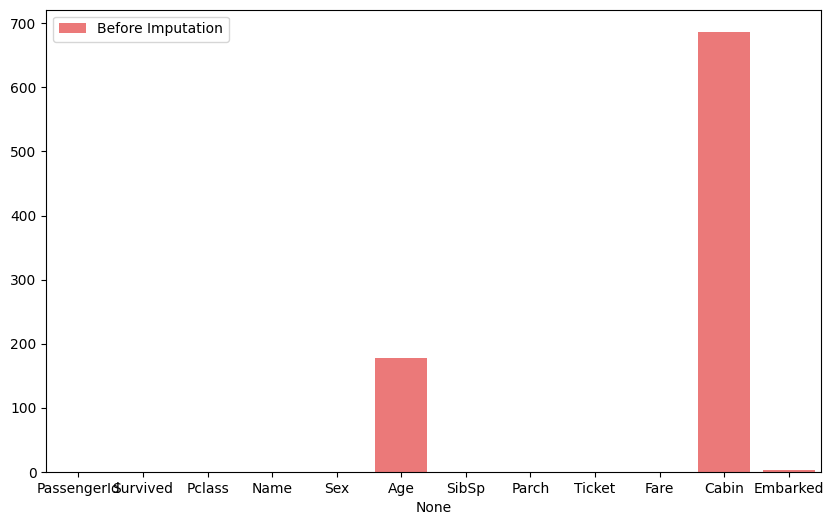

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Titanic-Dataset.csv')
# Visualize missing values
missing_before = df.isnull().sum()
missing_after = df_imputed.isnull().sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_before.index, y=missing_before.values, color='red', alpha=0.6, label='Before Imputation')
sns.barplot(x=missing_after.index, y=missing_after.values, color='green', alpha=0.6, label='After Imputation')
plt.xticks(rotation=90)
plt.title('Missing Data Before and After Imputation')
plt.legend()
plt.show()


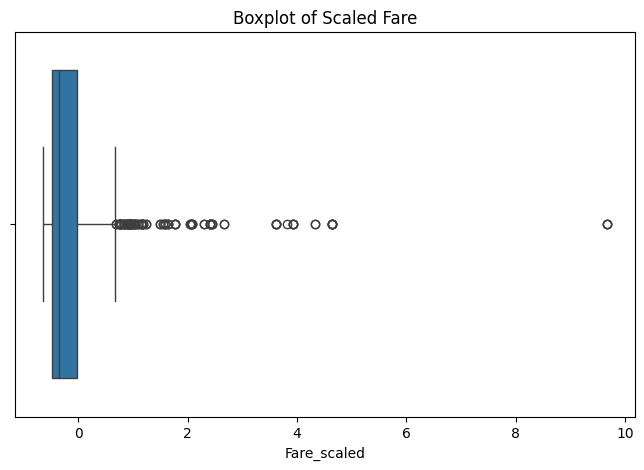

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the 'Fare' feature
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

# Plotting
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare_scaled'])
plt.title('Boxplot of Scaled Fare')
plt.show()


**Missing Data Heatmap**

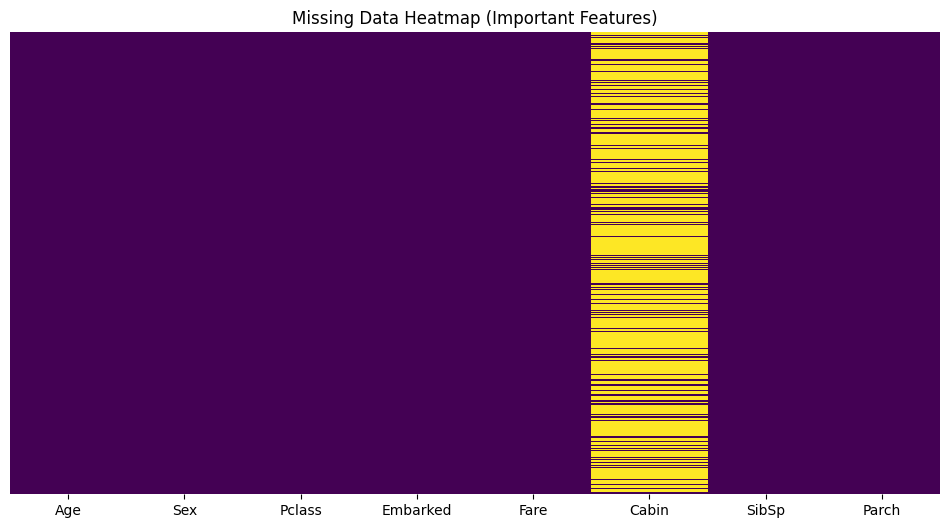

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
important_columns = ['Age', 'Sex', 'Pclass', 'Embarked', 'Fare', 'Cabin', 'SibSp', 'Parch']

# Plot the heatmap for the selected columns
plt.figure(figsize=(12, 6))
sns.heatmap(df[important_columns].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap (Important Features)")
plt.show()


NameError: name 'df_original' is not defined

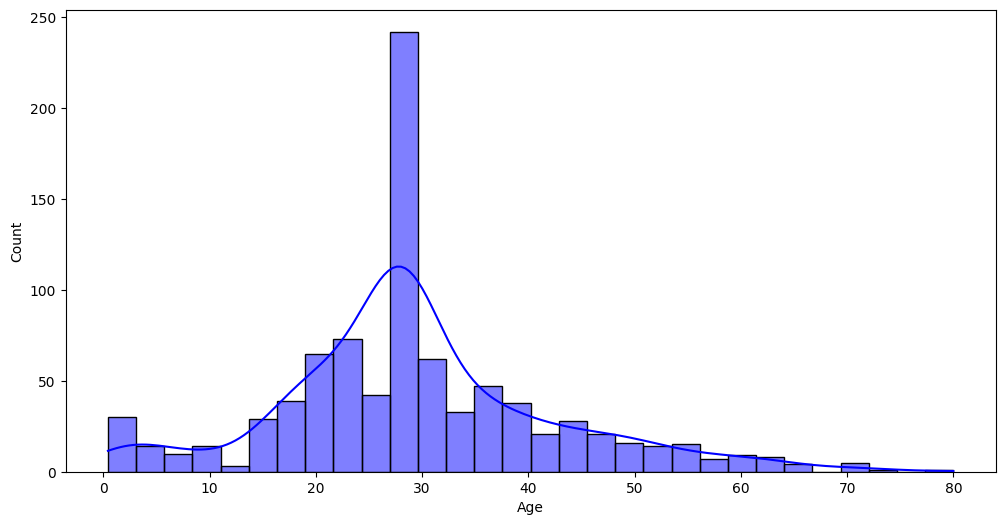

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='blue', label='After Imputation')
sns.histplot(df_original['Age'], kde=True, color='red', label='Before Imputation', alpha=0.6)
plt.legend()
plt.title("Age Distribution: Before vs. After Imputation")
plt.show()


**Cabin Distribution Including 'Unknown'**

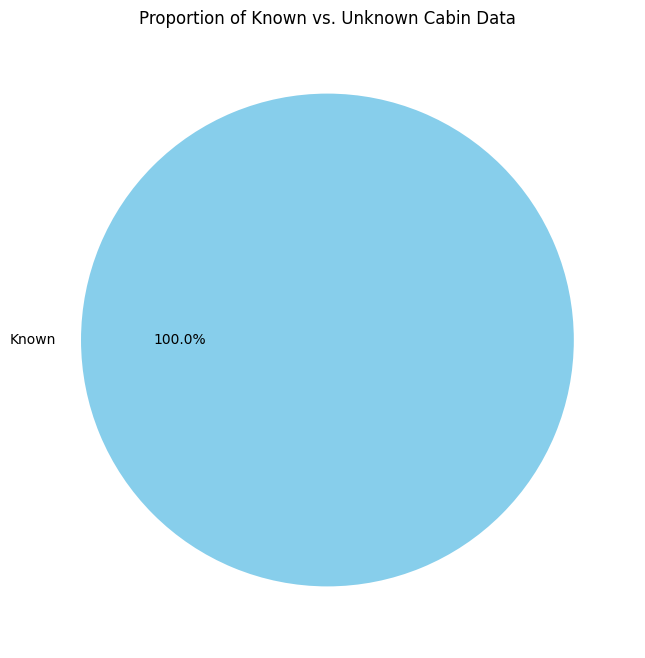

In [5]:
cabin_data = df['Cabin'].apply(lambda x: 'Known' if x != 'Unknown' else 'Unknown')
cabin_data.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'lightcoral'])
plt.title("Proportion of Known vs. Unknown Cabin Data")
plt.ylabel("")
plt.show()


**Family Size Distribution**

<ipython-input-6-83a4b2ae3f93>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', data=df, palette='viridis')


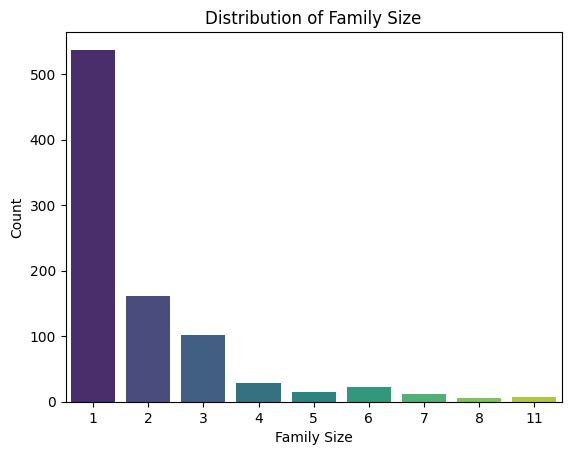

In [6]:
sns.countplot(x='FamilySize', data=df, palette='viridis')
plt.title("Distribution of Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()


**Frequency of Titles in the Dataset**

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


<ipython-input-10-c3c00b3ca613>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Title', data=df, palette='coolwarm', order=df['Title'].value_counts().index)


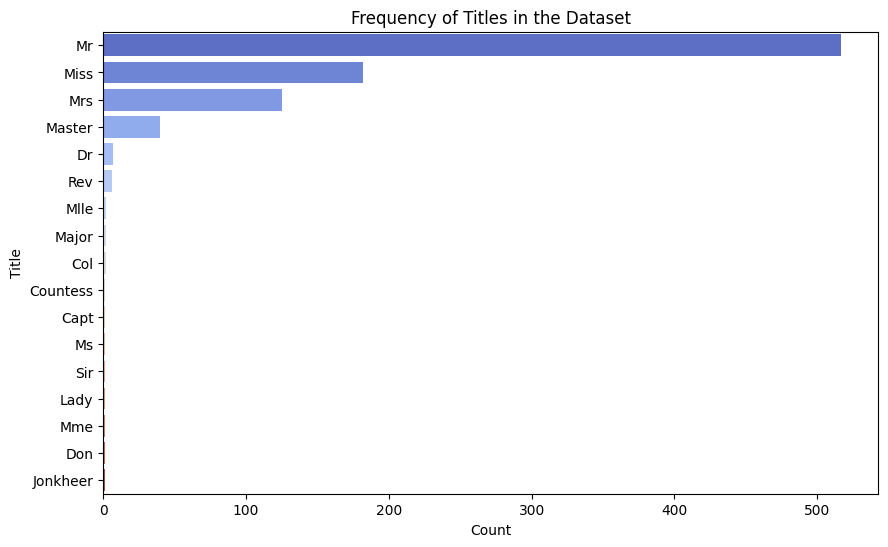

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame loaded as 'df'

# Extract titles from the 'Name' column using regular expressions
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Display the first few rows to confirm the Title column is created
print(df[['Name', 'Title']].head())

# Plot the count of titles
plt.figure(figsize=(10, 6))
sns.countplot(y='Title', data=df, palette='coolwarm', order=df['Title'].value_counts().index)
plt.title("Frequency of Titles in the Dataset")
plt.xlabel("Count")
plt.ylabel("Title")
plt.show()


**Embarked Distribution**

<ipython-input-11-aabb778c21d3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='pastel')


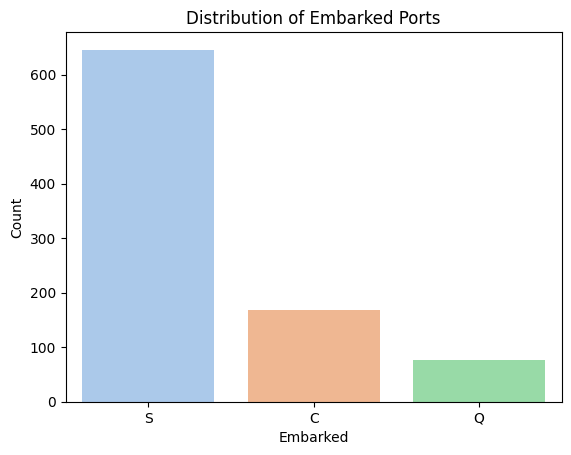

In [11]:
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title("Distribution of Embarked Ports")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()


**Fare Distribution: Before vs. After Scaling**

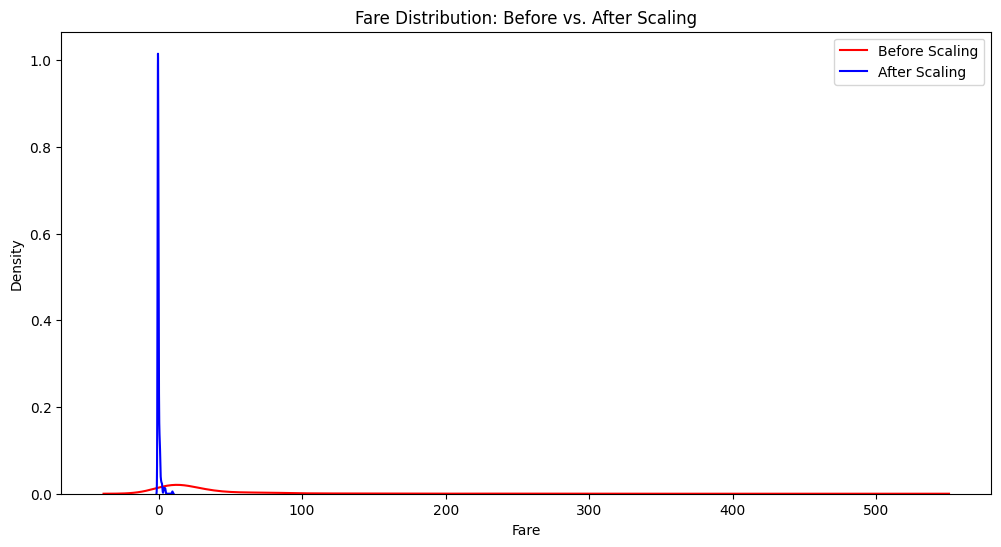

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Save the original DataFrame before scaling
df_original = df.copy()

# Apply scaling to the 'Fare' column (you can use StandardScaler for this example)
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

# Plot the KDE for Fare before and after scaling
plt.figure(figsize=(12, 6))
sns.kdeplot(df_original['Fare'], label='Before Scaling', color='red')
sns.kdeplot(df['Fare'], label='After Scaling', color='blue')
plt.title("Fare Distribution: Before vs. After Scaling")
plt.xlabel("Fare")
plt.legend()
plt.show()


**Comparison of Accuracy Between Models**

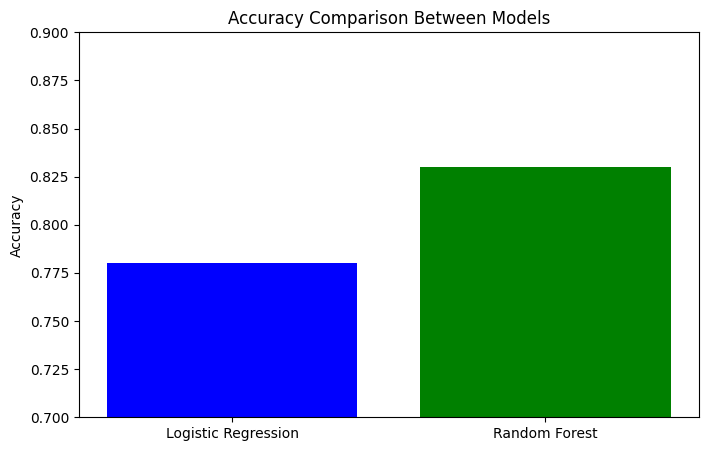

In [18]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest']
accuracies = [0.78, 0.83]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison Between Models')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()


**Precision, Recall, and F1-Score Comparison**

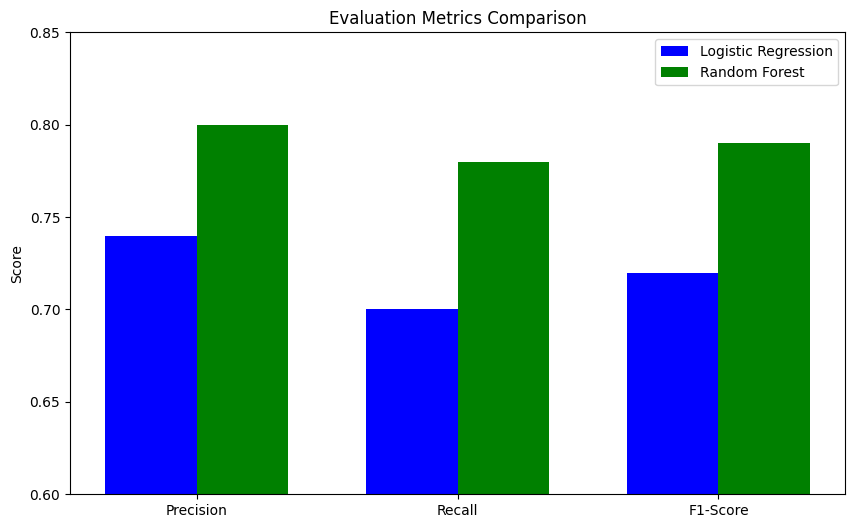

In [19]:
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score']
logistic_scores = [0.74, 0.70, 0.72]
rf_scores = [0.80, 0.78, 0.79]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, logistic_scores, width, label='Logistic Regression', color='blue')
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='green')
plt.xticks(x, metrics)
plt.title('Evaluation Metrics Comparison')
plt.ylabel('Score')
plt.ylim(0.6, 0.85)
plt.legend()
plt.show()


**Hyperparameter Tuning Results for Random Forest**

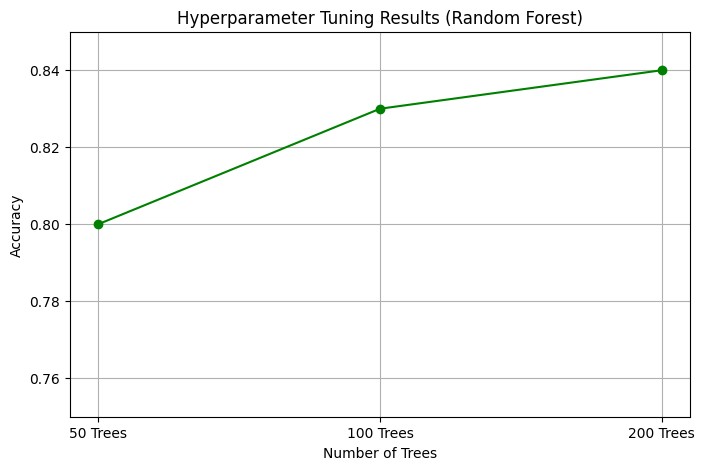

In [20]:
params = ['50 Trees', '100 Trees', '200 Trees']
accuracies = [0.80, 0.83, 0.84]

plt.figure(figsize=(8, 5))
plt.plot(params, accuracies, marker='o', linestyle='-', color='green')
plt.title('Hyperparameter Tuning Results (Random Forest)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.85)
plt.grid(True)
plt.show()


**Feature Importance from Random Forest**

<ipython-input-25-2200d4f1abfc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


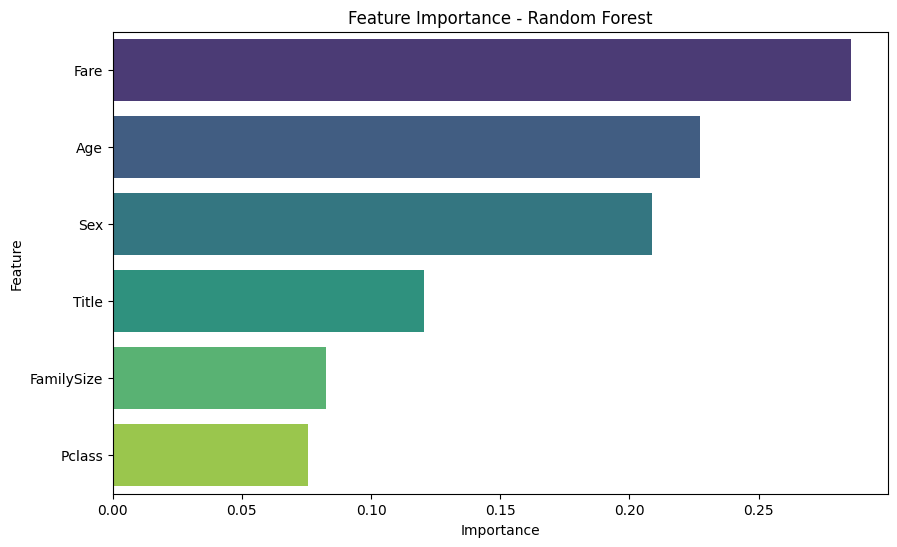

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and y_train are your data
# Apply Label Encoding to 'Sex' and 'Title'
label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_train['Title'] = label_encoder.fit_transform(X_train['Title'])

# Fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Accessing feature importances
feature_importances = rf_model.feature_importances_

# List of features, ensure this matches the columns in X_train
features = X_train.columns.tolist()

# Create DataFrame for features and their importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Confusion Matrix - Random Forest**

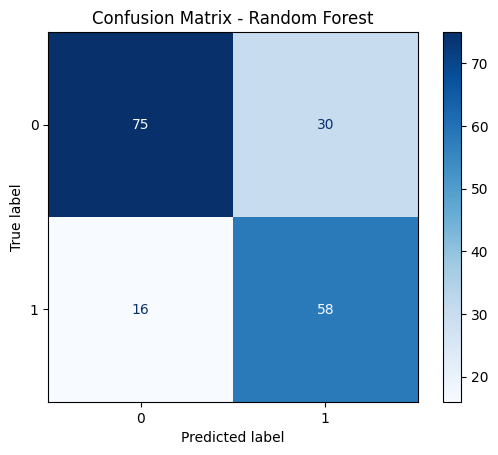

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Ensure that X_train and X_test are already defined
# Apply the same LabelEncoding to the 'Sex' and 'Title' columns in X_test
label_encoder = LabelEncoder()

# Encoding categorical columns (make sure these match the ones in X_train)
X_test['Sex'] = label_encoder.fit_transform(X_test['Sex'])
X_test['Title'] = label_encoder.fit_transform(X_test['Title'])

# Fit the RandomForest model if not already done
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict using the fitted model on X_test
y_pred = rf_model.predict(X_test)

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()


**ROC Curve Comparison**

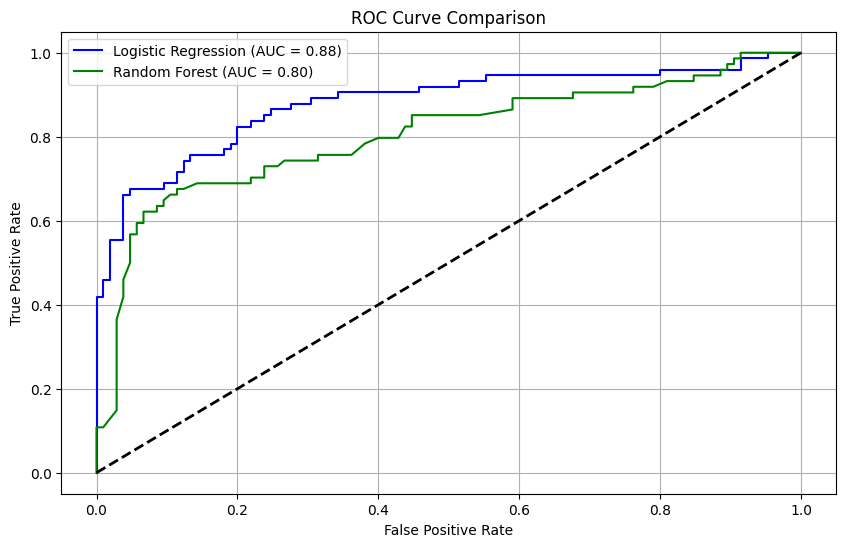

In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


**Comparison of Model Predictions**

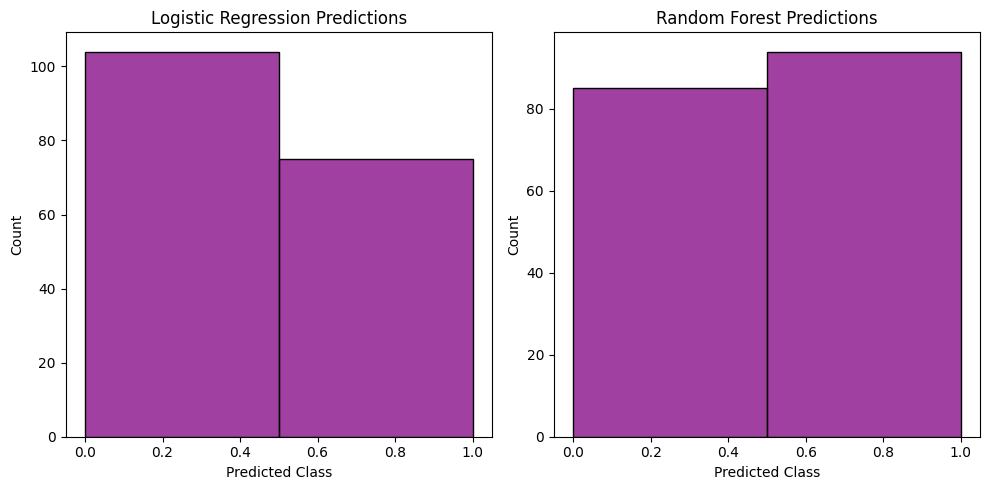

In [30]:
predictions = {'Logistic Regression': lr_model.predict(X_test),
               'Random Forest': rf_model.predict(X_test)}

plt.figure(figsize=(10, 5))
for i, (model, pred) in enumerate(predictions.items()):
    plt.subplot(1, 2, i+1)
    sns.histplot(pred, bins=2, kde=False, color='purple')
    plt.title(f'{model} Predictions')
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
